In [1]:
import gmaps
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
from config import gkey
from pprint import pprint

# Import API Key
gmaps.configure(api_key=gkey)

In [2]:
df = pd.read_csv("../exported_city_data.csv")
hm_locations = df[["Latitude", "Longitude"]]
hm_rating = df["Humidity"]
df

,Unnamed: 0,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,City ID,DateTime,Country
0,0,sao gotardo,-19,-46,66.52,48.0,0.0,9.82,3446406,1627132728,BR
1,1,midland,32,-102,74.97,64.0,1.0,5.99,5526337,1627132728,US
2,2,medvezhyegorsk,63,34,60.37,46.0,100.0,8.10,527888,1627132728,RU
3,5,vastervik,58,17,67.35,65.0,10.0,12.75,2713974,1627132729,SE
4,6,kushiro,42,145,65.91,93.0,43.0,7.96,2130677,1627132729,JP
...,...,...,...,...,...,...,...,...,...,...,...
799,982,bafq,32,56,98.60,8.0,0.0,18.32,111821,1627132985,IR
800,983,aktau,44,51,80.22,69.0,20.0,20.13,608398,1627132986,KZ
801,984,siddipet,18,79,80.58,75.0,100.0,9.08,1256377,1627132986,IN
802,985,lafia,9,9,74.01,84.0,98.0,6.80,2332662,1627132986,NG


In [4]:
figure_layout= {
    'width':'900px',
    'height':'700px',
    'border':'3px solid black',
    'padding': '1px',
}
heat_layer = gmaps.heatmap_layer(hm_locations, weights=hm_rating, dissipating=False, max_intensity=100,
                                 point_radius=2.5)
fig = gmaps.figure(layout=figure_layout)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='3px solid black', height='700px', padding='1px', width='900px'))

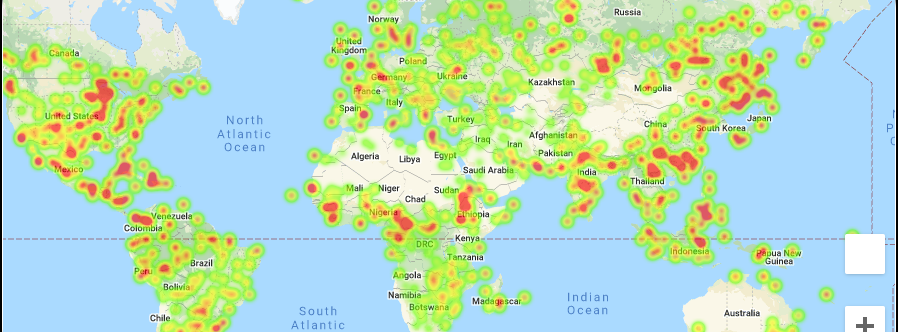

In [5]:
ideal_cities = (df.loc[(df['Cloudiness'] == 0) & (df['Wind Speed'] < 10) & (df['Temperature'] > 70) & (df['Temperature'] < 80)]).copy()

ideal_cities['Hotel Name'] = ""
ideal_cities['Hotel Latitude'] = 0.0
ideal_cities['Hotel Longitude'] = 0.0
ideal_cities

,Unnamed: 0,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,City ID,DateTime,Country,Hotel Name,Hotel Latitude,Hotel Longitude
13,16,partyzany,46,35,77.25,46.0,0.0,4.94,708877,1627132732,UA,,0.0,0.0
49,55,rio branco,-10,-68,76.91,73.0,0.0,1.14,3731287,1627132742,BR,,0.0,0.0
80,95,oskarshamn,57,17,75.15,60.0,0.0,8.48,2703684,1627132754,SE,,0.0,0.0
96,115,san pedro de ycuamandiyu,-24,-57,77.43,32.0,0.0,8.63,3437021,1627132759,PY,,0.0,0.0
103,122,luocheng,29,104,73.96,94.0,0.0,0.87,1800268,1627132761,CN,,0.0,0.0
127,152,rundu,-17,19,78.71,13.0,0.0,9.10,3347494,1627132769,AO,,0.0,0.0
143,172,sabinas,28,-101,75.81,79.0,0.0,7.40,4013688,1627132774,MX,,0.0,0.0
145,174,vrangel,42,133,78.69,87.0,0.0,8.68,2013258,1627132774,RU,,0.0,0.0
171,207,linchuan,27,116,72.28,95.0,0.0,4.34,1789963,1627132782,CN,,0.0,0.0
201,243,point pleasant,40,-74,76.48,62.0,0.0,1.01,4501550,1627132698,US,,0.0,0.0


In [6]:
# Setting up the API call
url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
radius = 5000
for i, x in ideal_cities.iterrows():
    lat = x['Latitude']
    lon = x['Longitude']
    print(f"{lat},{lon}")
    params = {
        "type": "lodging",
        "key": gkey,
        "radius": radius,
        "location": f"{lat},{lon}"
    }
    response = requests.get(url, params=params).json()

    try:
        print(response['results'][0]['name'])
        ideal_cities['Hotel Name'].loc[ideal_cities['City Name'] == x['City Name']] = response['results'][0]['name']
        ideal_cities['Hotel Latitude'].loc[ideal_cities['City Name'] == x['City Name']] = response['results'][0]['geometry']['location']['lat']
        ideal_cities['Hotel Longitude'].loc[ideal_cities['City Name'] == x['City Name']] = response['results'][0]['geometry']['location']['lng']
    except IndexError:
        print(f"No Hotel Found for {x['City Name']}")
        

46,35
No Hotel Found for partyzany
-10,-68
Casa da Maria do Apolônio
57,17
No Hotel Found for oskarshamn
-24,-57


C:\Users\joshu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Agro ganadera Santa Ana
29,104
No Hotel Found for luocheng
-17,19
No Hotel Found for rundu
28,-101
No Hotel Found for sabinas
42,133
No Hotel Found for vrangel
27,116
No Hotel Found for linchuan
40,-74
No Hotel Found for point pleasant
34,-79
No Hotel Found for conway
53,18
Hotel Brzoza Spa & Wellness
-25,-57
No Hotel Found for arroyos y esteros
-11,-75
Finca Nuevo Horizonte
34,-92
No Hotel Found for pine bluff
26,-108
No Hotel Found for sinaloa
37,141
いわき新舞子ハイツ
-21,21
No Hotel Found for ghanzi
28,114
Cihua Hotel
-11,-70
No Hotel Found for iberia
-14,-59
No Hotel Found for pontes e lacerda
-12,-67
No Hotel Found for riberalta
44,19
Улица Тобутска
34,111
No Hotel Found for sanmenxia
38,16
b&b L'antico borgo di Marinella
-3,111
No Hotel Found for pangkalanbuun
40,-78
Sanlawr Haven, LLC
44,34
No Hotel Found for katsiveli
43,76
No Hotel Found for kemin
43,134
No Hotel Found for preobrazheniye
37,-99
No Hotel Found for woodward


In [7]:
ideal_cities

,Unnamed: 0,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,City ID,DateTime,Country,Hotel Name,Hotel Latitude,Hotel Longitude
13,16,partyzany,46,35,77.25,46.0,0.0,4.94,708877,1627132732,UA,,0.000000,0.000000
49,55,rio branco,-10,-68,76.91,73.0,0.0,1.14,3731287,1627132742,BR,Casa da Maria do Apolônio,-10.017750,-67.978026
80,95,oskarshamn,57,17,75.15,60.0,0.0,8.48,2703684,1627132754,SE,,0.000000,0.000000
96,115,san pedro de ycuamandiyu,-24,-57,77.43,32.0,0.0,8.63,3437021,1627132759,PY,Agro ganadera Santa Ana,-23.959926,-57.007696
103,122,luocheng,29,104,73.96,94.0,0.0,0.87,1800268,1627132761,CN,,0.000000,0.000000
127,152,rundu,-17,19,78.71,13.0,0.0,9.10,3347494,1627132769,AO,,0.000000,0.000000
143,172,sabinas,28,-101,75.81,79.0,0.0,7.40,4013688,1627132774,MX,,0.000000,0.000000
145,174,vrangel,42,133,78.69,87.0,0.0,8.68,2013258,1627132774,RU,,0.000000,0.000000
171,207,linchuan,27,116,72.28,95.0,0.0,4.34,1789963,1627132782,CN,,0.000000,0.000000
201,243,point pleasant,40,-74,76.48,62.0,0.0,1.01,4501550,1627132698,US,,0.000000,0.000000


In [9]:
hotels = ideal_cities[["Hotel Name", 'Hotel Latitude', 'Hotel Longitude', 'City Name', 'Country']]
hotels.drop(hotels.loc[hotels['Hotel Name'] == ''].index, inplace=True)
hotels

C:\Users\joshu\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Hotel Name,Hotel Latitude,Hotel Longitude,City Name,Country
49,Casa da Maria do Apolônio,-10.017750,-67.978026,rio branco,BR
96,Agro ganadera Santa Ana,-23.959926,-57.007696,san pedro de ycuamandiyu,PY
253,Hotel Brzoza Spa & Wellness,53.030166,18.018961,bydgoszcz,PL
292,Finca Nuevo Horizonte,-11.032548,-75.010998,perene,PE
405,いわき新舞子ハイツ,37.024167,140.969722,iwaki,JP
477,Cihua Hotel,28.007902,114.032815,pingxiang,CN
683,Улица Тобутска,44.000236,18.977656,milici,BA
706,b&b L'antico borgo di Marinella,37.965764,15.986754,melito di porto salvo,IT
767,"Sanlawr Haven, LLC",40.002867,-77.981983,chambersburg,US


In [10]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City Name}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotels.iterrows()]
locations = hotels[["Hotel Latitude", "Hotel Longitude"]]

In [11]:
# Add marker layer ontop of heat map
marker_layer = gmaps.marker_layer(locations, info_box_content = hotel_info)

fig = gmaps.figure()
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

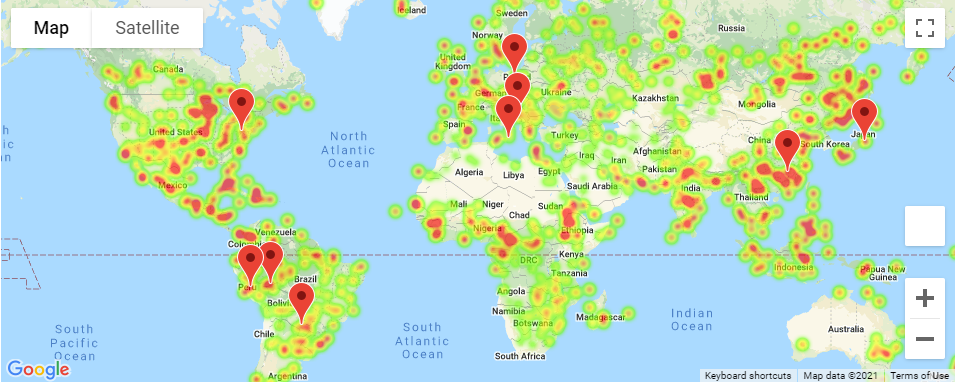